<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"
### Aluno: Pedro Lucas de Andrade Nunes
https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [86]:
import pandas as pd
import numpy as np
import functools
import itertools
import glob
import os
from io import StringIO
import datetime

In [2]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [3]:
df.loc[df.AAA >= 5, "BBB"] = -1
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [4]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [5]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [6]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [7]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

df["logic"] = np.where(df["AAA"] > 5, "high", "low")
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [9]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

df[df.AAA <= 5]
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


In [10]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [11]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [12]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [13]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999
df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [15]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

aValue = 43.0
df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [21]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0


In [22]:
AllCrit = Crit1 & Crit2 & Crit3


In [25]:
CritList = [Crit1, Crit2, Crit3]
AllCrit = functools.reduce(lambda x, y: x & y, CritList)
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


In [27]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [28]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

In [29]:
df.loc["bar":"kar"]  # Label
df[0:3]
df["bar":"kar"]


,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [30]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])  # Note index starts at 1.
df2.iloc[1:3]  # Position-oriented
df2.loc[1:3]  # Label-oriented


,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [31]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]


,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


In [ ]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})
df
source_cols = df.columns  # Or some subset would work too
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}
df[new_cols] = df[source_cols].map(categories.get)
df

In [32]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [33]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]


,AAA,BBB
1,1,1
5,2,1
6,3,2


In [34]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()


,AAA,BBB
0,1,1
1,2,1
2,3,2


In [36]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)
df
df = df.set_index("row")
df
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])
df
df = df.stack(0, future_stack=True).reset_index(1)
df
df.columns = ["Sample", "All_X", "All_Y"]
df

TypeError: DataFrame.stack() got an unexpected keyword argument 'future_stack'

In [38]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)
df

A                   B                   C          
          O         I         O         I         O         I
n  0.770732 -2.027308  2.143489 -0.476924 -1.047534 -0.483510
m  0.163833 -1.059919 -0.727266  0.855355 -0.155951  1.237043

In [39]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]
index = pd.MultiIndex.from_tuples(coords)
df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [40]:
df.xs("BB", level=0, axis=0)


,MyData
one,33
two,44
six,55


In [41]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [44]:
index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))
headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))
indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])
cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named
data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]
df = pd.DataFrame(data, indx, cols)
df
All = slice(None)
df.loc["Violet"]
df.loc[(All, "Math"), All]
df.loc[(slice("Ada", "Quinn"), "Math"), All]
df.loc[(All, "Math"), ("Exams")]
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


In [45]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

In [48]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)
df
df.bfill()

,A
2013-08-01,0.762285
2013-08-02,-0.652138
2013-08-05,0.395029
2013-08-06,0.110827
2013-08-07,0.547105
2013-08-08,-0.514986


In [49]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)
df
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()], include_groups=False)

TypeError: <lambda>() got an unexpected keyword argument 'include_groups'

In [50]:
gb = df.groupby("animal")
gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [51]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])


expected_df = gb.apply(GrowUp, include_groups=False)
expected_df

TypeError: GrowUp() got an unexpected keyword argument 'include_groups'

In [52]:
S = pd.Series([i / 100.0 for i in range(1, 11)])
def cum_ret(x, y):
    return x * (1 + y)

def red(x):
    return functools.reduce(cum_ret, x, 1.0)

S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [53]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})
gb = df.groupby("A")

def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())

gb.transform(replace)


,B
0,1
1,1
2,1
3,2


In [54]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

code_groups = df.groupby("code")
agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")
sorted_df = df.loc[agg_n_sort_order.index]
sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [55]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")
ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT

mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}
ts.resample("5min").apply(mhc)


,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [56]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

df

df["Counts"] = df.groupby(["Color"]).transform(len)
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [57]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)
df

df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)
df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [58]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])
mask = df.groupby(level=0).agg("idxmax")
df_count = df.loc[mask["no"]].reset_index()
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [59]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [60]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)
dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]
dfs[0]
dfs[1]
dfs[2]



,Case,Data
7,A,1.552449
8,A,1.154579


In [ ]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)



In [61]:
table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)
table.stack("City", future_stack=True)

KeyError: 'Sales'

In [63]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]
df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)

df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [65]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="ME", periods=36)
)


pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

ValueError: Invalid frequency: ME

In [66]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

def SeriesFromSubList(aList):
    return pd.Series(aList)

df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [68]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)
df

def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]

s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)
s

2001-01-01   -0.000662
2001-01-02   -0.001474
2001-01-03   -0.000353
2001-01-04   -0.001130
2001-01-05   -0.002149
                ...   
2006-04-30   -0.003307
2006-05-01   -0.002356
2006-05-02   -0.002190
2006-05-03   -0.000985
2006-05-04    0.000271
Length: 1950, dtype: float64

In [69]:
rng = pd.date_range(start="2014-01-01", periods=100)
df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)
df
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

window = 5
s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)
s.round(2)

,Open,Close,Volume
2014-01-01,-1.533478,1.057067,1534
2014-01-02,-1.031083,0.269622,848
2014-01-03,2.191527,-1.326820,825
2014-01-04,2.579446,-0.575802,1091
2014-01-05,-0.317885,0.683199,861
...,...,...,...
2014-04-06,-0.710825,1.034123,379
2014-04-07,0.970146,1.078116,1114
2014-04-08,1.744710,0.927126,573
2014-04-09,1.841934,0.722861,1535


In [70]:
dates = pd.date_range("2000-01-01", periods=5)
dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

In [71]:
rng = pd.date_range("2000-01-01", periods=6)
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])
df2 = df1.copy()

In [72]:
df = pd.concat([df1, df2], ignore_index=True)
df

,A,B,C
0,0.733883,-0.224242,-0.981821
1,1.678246,0.092474,1.996961
2,0.642468,0.413990,1.320223
3,0.470676,-0.427670,1.879433
4,-0.157663,-0.680598,0.500595
5,-0.472097,1.494152,-0.319868
6,0.733883,-0.224242,-0.981821
7,1.678246,0.092474,1.996961
8,0.642468,0.413990,1.320223
9,0.470676,-0.427670,1.879433


In [73]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)
df

df["Test_1"] = df["Test_0"] - 1
pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,-0.904955,-1,1,-0.225953,0
1,A,160,0,0.255727,-1,1,-0.978908,0
2,A,160,1,-0.978908,0,2,-1.153416,1
3,C,40,0,0.786524,-1,1,-0.355663,0


<Axes: title={'center': 'price'}, xlabel='quartiles'>

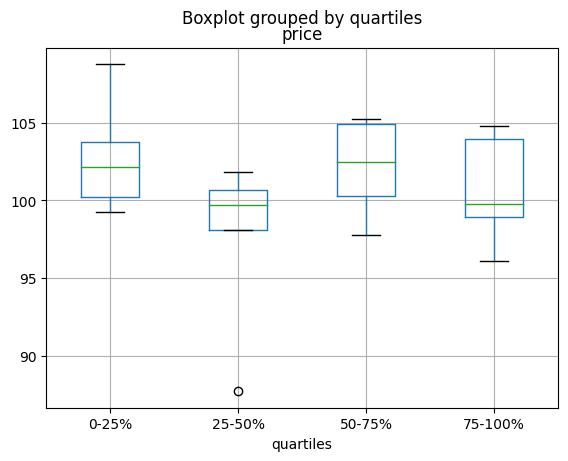

In [74]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)

df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)

df.boxplot(column="price", by="quartiles")

In [75]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))

files = ["file_0.csv", "file_1.csv", "file_2.csv"]
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [77]:
files = glob.glob("file_*.csv")
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [78]:
i = pd.date_range("20000101", periods=10000)
df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})
df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [79]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""


In [80]:
pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

NameError: name 'StringIO' is not defined

In [81]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns
pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

NameError: name 'StringIO' is not defined

In [82]:
df = pd.DataFrame(np.random.randn(8, 3))
store = pd.HDFStore("test.h5")
store.put("df", df)
store.get_storer("df").attrs.my_attribute = {"A": 10}
store.get_storer("df").attrs.my_attribute

{'A': 10}

In [83]:
store = pd.HDFStore("test.h5", "w", driver="H5FD_CORE")
df = pd.DataFrame(np.random.randn(8, 3))
store["test"] = df
store.close()

ValueError: The file 'test.h5' is already opened.  Please close it before reopening in write mode.

In [84]:
df = pd.DataFrame(np.random.random(size=(100, 5)))
corr_mat = df.corr()
mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)
corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,-0.070249,NaN,NaN,NaN,NaN
2,0.133794,-0.155328,NaN,NaN,NaN
3,-0.004642,-0.199902,0.175627,NaN,NaN
4,0.103684,0.096283,-0.020599,-0.07887,NaN


In [85]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


df = pd.DataFrame(np.random.normal(size=(100, 3)))
df.corr(method=distcorr)

,0,1,2
0,1.000000,0.159985,0.194734
1,0.159985,1.000000,0.271036
2,0.194734,0.271036,1.000000


In [87]:
s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
s - s.max()
s.max() - s
s - datetime.datetime(2011, 1, 1, 3, 5)
s + datetime.timedelta(minutes=5)
datetime.datetime(2011, 1, 1, 3, 5) - s
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [88]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])
df = pd.DataFrame({"A": s, "B": deltas})
df
df["New Dates"] = df["A"] + df["B"]
df["Delta"] = df["A"] - df["New Dates"]
df
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [89]:
y = s - s.shift()
y
y[1] = np.nan

In [90]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)

df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


In [92]:
v = s.to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [93]:
v = s.dropna().to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [94]:
v = s.to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()